In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Raw Data preprocessing Step
Combine data from year 2018 to 2021 into one dataset, look into dtype and missing values of each column,
removing columns that provide zero inforamtion and re-organize rest columns


In [5]:
#read the NFL data (from 2018 - 2021)

data2021 = pd.read_csv("/home/wenrui/Downloads/pbp-2021.csv")
data2020 = pd.read_csv("/home/wenrui/Downloads/pbp-2020.csv")
data2019 = pd.read_csv("/home/wenrui/Downloads/pbp-2019.csv")
data2018 = pd.read_csv("/home/wenrui/Downloads/pbp-2018.csv")



#check the shape of the data
print(data2021.shape)
print(data2020.shape)
print(data2019.shape)
print(data2018.shape)

(8586, 45)
(46189, 45)
(42186, 45)
(45016, 45)


In [6]:
#check if any columns are different among data
print(sum(data2021.columns != data2020.columns))
print(sum(data2020.columns != data2019.columns))
print(sum(data2019.columns != data2018.columns))
print("All columns are matching!")

0
0
0
All columns are matching!


In [7]:
#concat all four subsets by columns

nfl_data = pd.concat([data2021, data2020, data2019, data2018], axis=0)

print(f"The combined data shape is {nfl_data.shape}")

nfl_data.head().T

The combined data shape is (141977, 45)


,0,1,2,3,4
GameId,2021092700,2021092700,2021092609,2021092609,2021092609
GameDate,2021-09-27,2021-09-27,2021-09-26,2021-09-26,2021-09-26
Quarter,4,4,3,2,2
Minute,0,2,14,0,0
Second,46,0,12,0,37
OffenseTeam,DAL,NaN,NaN,NaN,NaN
DefenseTeam,PHI,NaN,NaN,NaN,NaN
Down,1,0,0,0,0
ToGo,10,0,0,0,0
YardLine,56,100,100,100,100


In [8]:
#Call the info method on NFL data to check the summary of the data
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141977 entries, 0 to 45015
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   GameId                          141977 non-null  int64  
 1   GameDate                        141977 non-null  object 
 2   Quarter                         141977 non-null  int64  
 3   Minute                          141977 non-null  int64  
 4   Second                          141977 non-null  int64  
 5   OffenseTeam                     130714 non-null  object 
 6   DefenseTeam                     137260 non-null  object 
 7   Down                            141977 non-null  int64  
 8   ToGo                            141977 non-null  int64  
 9   YardLine                        141977 non-null  int64  
 10  Unnamed: 10                     0 non-null       float64
 11  SeriesFirstDown                 141977 non-null  int64  
 12  Unnamed: 12      

In [9]:
#select object features and numeric features
object_features = nfl_data.select_dtypes(include='object').columns
numeric_features = nfl_data.select_dtypes(exclude='object').columns


In [78]:
#Check of number of missing data per column for object and numeric features


missing = pd.concat([nfl_data.isnull().sum(), 100 * nfl_data.isnull().mean()], axis=1)
missing.columns=['count',  '%missing']
pd.set_option('display.max_rows', missing.shape[0]+1)
sorted_missing = missing.sort_values(by='count', ascending=False)


print(f"Missing data in object features:\n{sorted_missing.loc[list(object_features)].sort_values('%missing')}")

print(f"Missing data in numeric features:\n{sorted_missing.loc[list(numeric_features)].sort_values('%missing')}")

Missing data in object features:
                    count   %missing
GameDate                0   0.000000
Description             0   0.000000
YardLineDirection       0   0.000000
Formation            2720   1.915803
DefenseTeam          4717   3.322369
PlayType             5546   3.906267
OffenseTeam         11263   7.932975
PassType            83548  58.846151
RushDirection      103692  73.034365
PenaltyType        130425  91.863471
PenaltyTeam        130427  91.864880
Missing data in numeric features:
                                 count  %missing
GameId                               0       0.0
IsPenaltyAccepted                    0       0.0
YardLineFixed                        0       0.0
IsTwoPointConversionSuccessful       0       0.0
IsTwoPointConversion                 0       0.0
IsPenalty                            0       0.0
IsFumble                             0       0.0
IsInterception                       0       0.0
IsMeasurement                        0       0.0

In [18]:
'''
Removing all unnamed columns (just separation line in the csv table)
Remove Challenger and penalties from the raw dataset

'''

filtered_data = nfl_data.drop(['Challenger', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 10'\
                              ,'PenaltyType', 'PenaltyTeam'], axis=1)




In [19]:
'''
Explore the reasons of missing values in Formation and PlayType
'''

#Most missing Formation are not related with game play itself

print(f"Missing Formation are not related with game play itself:\n\
{filtered_data[filtered_data.Formation.isnull()].value_counts('Description')}")




Missing Formation are not related with game play itself:
Description
END QUARTER 1                                                                               795
END QUARTER 3                                                                               794
END QUARTER 2                                                                               789
GAME                                                                                        304
END QUARTER 4                                                                                36
END QUARTER 2 5TH CONSECUTIVE 1ST-HALF SHUTOUT (INCLUDING PLAYOFFS)                           1
END QUARTER 4 TENN CALLED TAILS. COIN TOSS WAS HEADS. BAL WINS TOSS AND WILL RECEIVE KO.      1
dtype: int64


In [20]:
'''
Explore the reasons of missing values in PlayType
'''

##Missing PlayType are not related with game play itself

print(f"Missing PlayType are not related with game play itself:\n\
{filtered_data[filtered_data.PlayType.isnull()].value_counts('Description')}")

Missing PlayType are not related with game play itself:
Description
TWO-MINUTE WARNING                                                                                              1584
END QUARTER 1                                                                                                    795
END QUARTER 3                                                                                                    794
END QUARTER 2                                                                                                    789
END GAME                                                                                                         788
                                                                                                                ... 
TIMEOUT AT 00:00.                                                                                                  1
END QUARTER 4 TENN CALLED TAILS. COIN TOSS WAS HEADS. BAL WINS TOSS AND WILL RECEIVE KO.                         

In [21]:
'''
Explore the reasons of missing values in DefenseTeam
'''

##Missing DefenseTeamare not related with game play itself

print(f"Missing PlayType are not related with game play itself:\n\
{filtered_data[filtered_data.DefenseTeam.isnull()].value_counts('Description')}")

Missing PlayType are not related with game play itself:
Description
TWO-MINUTE WARNING             616
GAME                           304
END QUARTER 1                  304
END GAME                       304
END QUARTER 3                  304
                              ... 
TIMEOUT #1 BY PIT AT 00:27.      1
TIMEOUT #1 BY PIT AT 00:42.      1
TIMEOUT #1 BY PIT AT 00:46.      1
TIMEOUT #1 BY PIT AT 00:50.      1
TIMEOUT #2 BY DEN AT 00:05.      1
Length: 2438, dtype: int64


In [22]:
'''
Explore the reasons of missing values in OffenseTeam
'''

##Missing DefenseTeamare not related with game play itself

print(f"Missing PlayType are not related with game play itself:\n\
{filtered_data[filtered_data.OffenseTeam.isnull()].value_counts('Description')}")

Missing PlayType are not related with game play itself:
Description
TWO-MINUTE WARNING             1584
END QUARTER 1                   795
END QUARTER 3                   794
END QUARTER 2                   789
END GAME                        788
                               ... 
TIMEOUT #1 BY OAK AT 09:44.       1
TIMEOUT #1 BY OAK AT 09:13.       1
TIMEOUT #1 BY OAK AT 09:00.       1
TIMEOUT #1 BY OAK AT 08:32.       1
TIMEOUT #2 BY CHI AT 03:51.       1
Length: 5532, dtype: int64


In [29]:
#removing all irrelavent rows from fitlered data

filtered_data_v2 = filtered_data[~np.logical_or.reduce(filtered_data[['Formation', 'PlayType', 'OffenseTeam'\
                                                                      , 'DefenseTeam']].isna(), axis=1)]
filtered_data_v2.isna().sum().T

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'SeriesFirstDown',
       'NextScore', 'Description', 'TeamWin', 'SeasonYear', 'Yards',
       'Formation', 'PlayType', 'IsRush', 'IsPass', 'IsIncomplete',
       'IsTouchdown', 'PassType', 'IsSack', 'IsChallenge',
       'IsChallengeReversed', 'IsMeasurement', 'IsInterception', 'IsFumble',
       'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful',
       'RushDirection', 'YardLineFixed', 'YardLineDirection',
       'IsPenaltyAccepted', 'IsNoPlay', 'PenaltyYards'],
      dtype='object')


GameId                                0
GameDate                              0
Quarter                               0
Minute                                0
Second                                0
OffenseTeam                           0
DefenseTeam                           0
Down                                  0
ToGo                                  0
YardLine                              0
SeriesFirstDown                       0
NextScore                             0
Description                           0
TeamWin                               0
SeasonYear                            0
Yards                                 0
Formation                             0
PlayType                              0
IsRush                                0
IsPass                                0
IsIncomplete                          0
IsTouchdown                           0
PassType                          72158
IsSack                                0
IsChallenge                           0


In [53]:
'''
Checking the missing values for PassType and RushDirection
'''
#Remove entries where both PassType and RushDirection are null as they are TouchBacks

print("Remove entries where both PassType and RushDirection are null as they are TouchBacks\n")

print(filtered_data_v2[np.logical_and(filtered_data_v2.RushDirection.isnull(), filtered_data_v2.PassType.isnull())]\
.value_counts('Description'))





filtered_data_v3 = filtered_data_v2[~np.logical_and(filtered_data_v2.RushDirection.isnull(), filtered_data_v2.PassType.isnull())]


print(f"\n\nThe final data shape is {filtered_data_v3.shape}")

Remove entries where both PassType and RushDirection are null as they are TouchBacks

Description
7-H.BUTKER KICKS 65 YARDS FROM KC 35 TO END ZONE, TOUCHBACK.                                                                                                                                                                    217
3-W.LUTZ KICKS 65 YARDS FROM NO 35 TO END ZONE, TOUCHBACK.                                                                                                                                                                      196
9-J.TUCKER KICKS 65 YARDS FROM BAL 35 TO END ZONE, TOUCHBACK.                                                                                                                                                                   177
8-B.PINION KICKS 65 YARDS FROM TB 35 TO END ZONE, TOUCHBACK.                                                                                                                                                              

In [58]:
#Check if all NFL teams are included (Raiders, Chargers and Rams Changed its name in the year 2020!)

print(f"Total Team listed in Offense is {len(set(filtered_data_v3.OffenseTeam))}")
print(f"Total Team listed in Defense is {len(set(filtered_data_v3.DefenseTeam))}")
print(f"Same Teams listed in Offense and in Defense {set(filtered_data_v3.DefenseTeam) == set(filtered_data_v3.OffenseTeam)}")
#

Total Team listed in Offense is 32
Total Team listed in Defense is 32
Same Teams listed in Offense and in Defense True


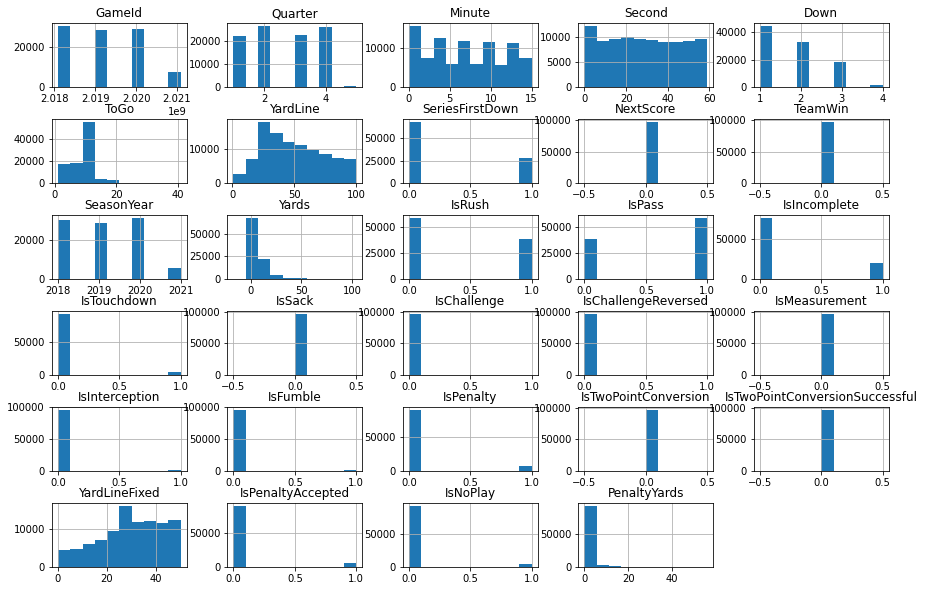

In [86]:
#Show data type histagram
filtered_data_v3.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

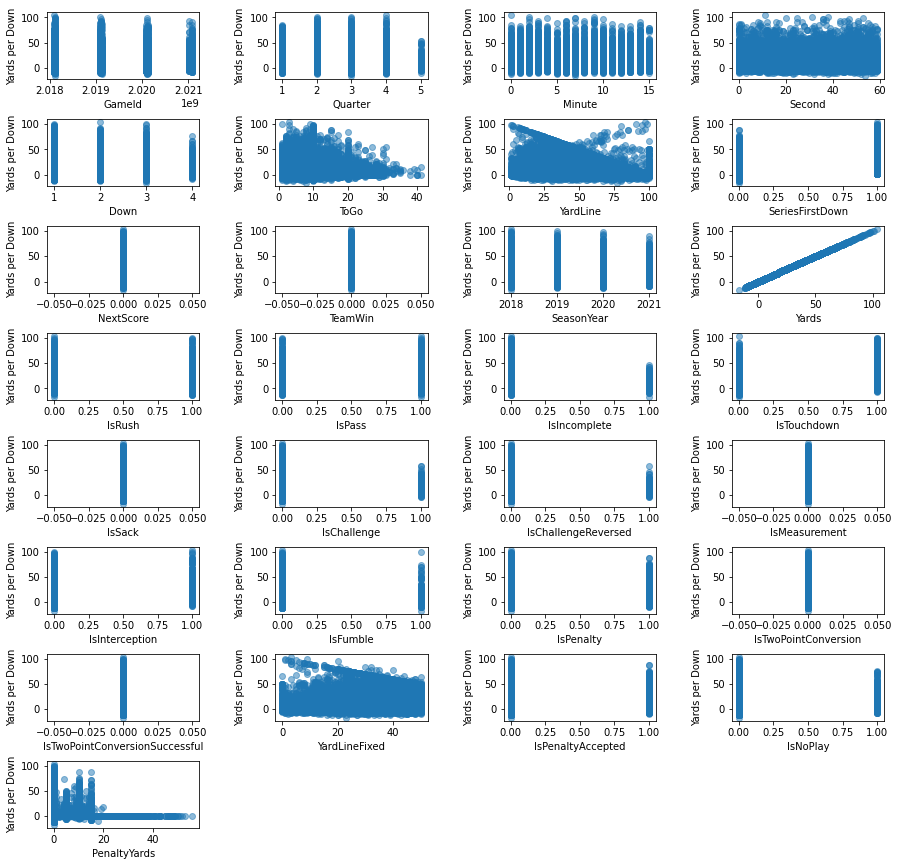

In [103]:
#Check which numeric variables are correlated with Yards in the dataset

#get all numeric variables from filtered_data_v3
filtered_data_v3_num = filtered_data_v3.select_dtypes(exclude='object')

# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Yards', data=filtered_data_v3, alpha=0.5)
        ax.set(xlabel=col, ylabel='Yards per Down')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
        
features = [col_x for col_x in filtered_data_v3_num.columns]


scatterplots(features, ncol=4, figsize=(15, 15))


## Strong correlations between Yards and numeric variables were not observed
## Try to explore relationship of Yards with categorical variables

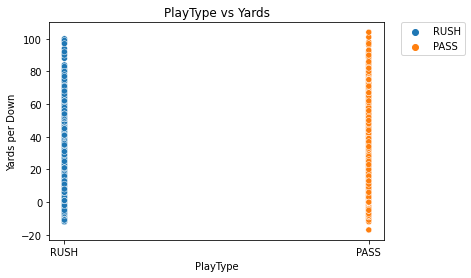

In [117]:
#Check Yards relationship with PlayType and Formations

sns.scatterplot(x="PlayType", y="Yards", data=filtered_data_v3, hue='PlayType')
plt.title("PlayType vs Yards")
plt.ylabel("Yards per Down")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();
    

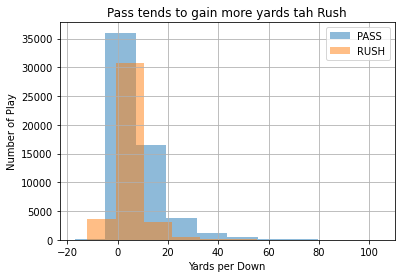

In [125]:
#PASS and RUSH does not make a significant difference in terms of Yards per down (Does not make sense)
#Check the Histogram between PASS and RUSH

Yards_for_pass = filtered_data_v3[filtered_data_v3.PlayType=='PASS'].Yards.hist(alpha=0.5, label='PASS')

Yards_for_rush = filtered_data_v3[filtered_data_v3.PlayType=='RUSH'].Yards.hist(alpha=0.5, label='RUSH')

plt.legend(loc='upper right')
plt.xlabel('Yards per Down')
plt.ylabel('Number of Play')
plt.title('Pass tends to gain more yards tah Rush')
plt.show()





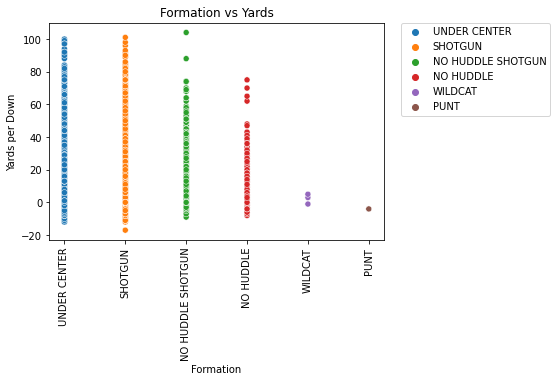

In [134]:
sns.scatterplot(x="Formation", y="Yards", data=filtered_data_v3, hue='Formation')
plt.title("Formation vs Yards")
plt.ylabel("Yards per Down")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

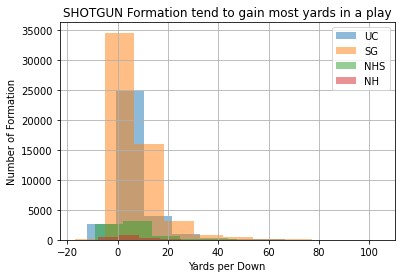

In [137]:
#check the histogram between four popular formations

Yards_for_UC = filtered_data_v3[filtered_data_v3.Formation=='UNDER CENTER'].Yards.hist(alpha=0.5, label='UC')

Yards_for_SG = filtered_data_v3[filtered_data_v3.Formation=='SHOTGUN'].Yards.hist(alpha=0.5, label='SG')

Yards_for_NHS = filtered_data_v3[filtered_data_v3.Formation=='NO HUDDLE SHOTGUN'].Yards.hist(alpha=0.5, label='NHS')

Yards_for_NH = filtered_data_v3[filtered_data_v3.Formation=='NO HUDDLE'].Yards.hist(alpha=0.5, label='NH')

plt.legend(loc='upper right')
plt.xlabel('Yards per Down')
plt.ylabel('Number of Formation')
plt.title('SHOTGUN Formation tend to gain most yards in a play')
plt.show()


## Convert categorical features for one hot vector and store the data for further analysis

In [138]:
#convert Formation, PlayType, OffenseTeam and DefenseTeam into one hot vector
PlayType_dummies = pd.get_dummies(filtered_data_v3.PlayType, prefix='PlayType')

Offense_dummies = pd.get_dummies(filtered_data_v3.OffenseTeam, prefix='Offense')
Defense_dummies = pd.get_dummies(filtered_data_v3.DefenseTeam, prefix='Defense')

Formation_dummies = pd.get_dummies(filtered_data_v3.Formation, prefix='Formation')

In [139]:
#combine dummies to obtain the final data

final_data = pd.concat([filtered_data_v3, PlayType_dummies, Offense_dummies, Defense_dummies, Formation_dummies], axis=1)


print(f"The Final Data shape is {final_data.shape}")

final_data.dtypes

The Final Data shape is (96713, 110)


GameId                          int64
GameDate                       object
Quarter                         int64
Minute                          int64
Second                          int64
                                ...  
Formation_NO HUDDLE SHOTGUN     uint8
Formation_PUNT                  uint8
Formation_SHOTGUN               uint8
Formation_UNDER CENTER          uint8
Formation_WILDCAT               uint8
Length: 110, dtype: object

In [140]:
final_data.to_csv("preprocessed_nfl_data.csv")
print('Finished!')

Finished!
